<a href="https://colab.research.google.com/github/SumitNawathe/HateSpeechModel/blob/main/Final_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs/Upgrades

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install torch
!pip install pytorch-lightning
!pip install transformers

In [ ]:
!pip install --upgrade pandas
!pip3 install pickle5

In [ ]:
!pip install -U sentence-transformers

If running for first time, restart runtime to apply changes.

In [ ]:
import numpy as np
import pandas as pd
import pickle5 as pickle
from sentence_transformers import SentenceTransformer

## Useful Functions/Values

In [ ]:
# returns 1 if, for any of the categories, the corresponding entry in
# row is 1. otherwise, returns 0
def contains_cat_or(row: pd.Series, categories: list) -> int:
  for item in categories:
    if row[item] == 1:
      return 1
  return 0

In [ ]:
# list of original label columns
# is overwritten in Data Combining section to balance dataset
LABEL_COLUMNS_OLD = ['race', 'east_asian', 'south_asian', 'black', 'hispanic', 'arab', 'immigrant', 'other_race',
                 'religion', 'jew', 'muslim', 'christian', 'other_relig', 'gender', 'women', 'lgbt',
                 'disability', 'economic', 'political', 'not_hate']

In [ ]:
# removes rows of dataframe for which no category is marked
def remove_nonclassified(df: pd.DataFrame) -> pd.DataFrame:
  temp = df.copy()
  temp = df.drop(df[df.apply(lambda row: contains_cat_or(row, LABEL_COLUMNS_OLD), axis=1) == 0].index)
  return temp

## Generated Hate Speech Dataset

Source: https://www.kaggle.com/usharengaraju/dynamically-generated-hate-speech-dataset

This dataset contains human- and machine-generated hate speech samples, and is constructed to be used in training hate speech models.

In [ ]:
entriesdf = pd.read_csv('2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv')
targetsdf = pd.read_csv('2020-12-31-DynamicallyGeneratedHateDataset-targets-v0.1.csv')

C:\Users\Sumit Nawathe\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
generated_comb = pd.merge(entriesdf, targetsdf, on='id', how='inner')
generated_comb.shape

(32768, 54)

Some hateful entries for east asians are marked with 2's instead of 1's. Correcting here.

In [ ]:
generated_comb['east'].replace([2], 1, inplace=True)
generated_comb['south'].replace([2], 1, inplace=True)

In [ ]:
generated_comb.keys()

Index(['Unnamed: 0', 'id', 'text', 'label', 'type', 'model_wrong',
       'db.model_preds', 'status', 'round', 'split', 'annotator', 'none',
       'dis', 'bla', 'trav', 'jew', 'mus', 'trans', 'indig', 'immig', 'for',
       'blaman', 'gayman', 'east', 'south', 'mixed', 'gendermin', 'gay',
       'gaywom', 'arab', 'wom', 'chinese', 'ref', 'asylum', 'blawom', 'asiwom',
       'muswom', 'non-white', 'hispanic', 'bis', 'ethnic minority', 'nazi',
       'asi', 'pak', 'pol', 'eastern european', 'working', 'african',
       'russian', 'indigwom', 'old', 'hitler', 'NoTargetRecorded', 'other'],
      dtype='object')

In [ ]:
generated_final = generated_comb.copy()

In [ ]:
generated_final['language'] = 'english'
generated_final['text'] = generated_comb['text']

generated_final['race'] = generated_comb.apply(lambda row: contains_cat_or(row,
  ['mixed', 'ethnic minority', 'indig', 'indigwom', 'non-white', 'trav', 'bla', 
   'blawom', 'blaman', 'african', 'asi', 'asiwom', 'east', 'south', 'chinese', 
   'pak', 'arab', 'immig', 'asylum', 'ref', 'for', 'eastern european', 
   'russian', 'pol', 'hispanic']), axis=1)
generated_final['east_asian'] = generated_comb.apply(lambda row: contains_cat_or(row, ['asi', 'asiwom', 'east', 'chinese']), axis=1)
generated_final['south_asian'] = generated_comb.apply(lambda row: contains_cat_or(row, ['south', 'pak']), axis=1)
generated_final['black'] = generated_comb.apply(lambda row: contains_cat_or(row, ['bla', 'blawom', 'blaman', 'african']), axis=1)
generated_final['hispanic'] = generated_comb['hispanic']
generated_final['arab'] = generated_comb['arab']
generated_final['immigrant'] = generated_comb.apply(lambda row: contains_cat_or(row, ['immig', 'asylum', 'ref', 'for']), axis=1)
generated_final['other_race'] = generated_comb.apply(lambda row: contains_cat_or(row,
  ['eastern european', 'russian', 'pol', 'mixed', 'ethnic minority', 'indig', 
   'indigwom', 'non-white', 'trav']), axis=1)
generated_final['religion'] = generated_comb.apply(lambda row: contains_cat_or(row, ['jew', 'mus', 'muswom']), axis=1)
generated_final['jew'] = generated_comb['jew']
generated_final['muslim'] = generated_comb.apply(lambda row: contains_cat_or(row, ['mus', 'muswom']), axis=1)
generated_final['christian'] = 0
generated_final['other_relig'] = 0

generated_final['gender'] = generated_comb.apply(lambda row: contains_cat_or(row, ['wom', 'trans', 'gendermin', 'bis', 'gay', 'gayman', 'gaywom']), axis=1)
generated_final['women'] = generated_comb['wom']
generated_final['lgbt'] = generated_comb.apply(lambda row: contains_cat_or(row, ['trans', 'gendermin', 'bis', 'gay', 'gayman', 'gaywom']), axis=1)

generated_final['disability'] = generated_comb.apply(lambda row: contains_cat_or(row, ['dis', 'old']), axis=1)
generated_final['economic'] = generated_comb['working']

generated_final['political'] = generated_comb.apply(lambda row: contains_cat_or(row, ['nazi', 'hitler']), axis=1)

generated_final['not_hate'] = generated_comb['none']

In [ ]:
generated_final.drop(columns=['Unnamed: 0', 'id', 'label', 'type', 'model_wrong',
  'db.model_preds', 'status', 'round', 'split', 'annotator', 'none', 'dis',
  'bla', 'trav', 'mus', 'trans', 'indig', 'immig', 'for', 'blaman', 'gayman',
  'east', 'south', 'mixed', 'gendermin', 'gay', 'gaywom', 'wom', 'chinese',
  'ref', 'asylum', 'blawom', 'asiwom', 'muswom', 'non-white', 'bis', 'ethnic minority',
  'nazi', 'asi', 'pak', 'pol', 'eastern european', 'russian', 'working',
  'indigwom', 'old', 'hitler', 'NoTargetRecorded', 'other', 'african'], inplace=True)

In [ ]:
generated_final.shape, generated_final.keys()

((32768, 22),
 Index(['text', 'jew', 'arab', 'hispanic', 'language', 'race', 'east_asian',
        'south_asian', 'black', 'immigrant', 'other_race', 'religion', 'muslim',
        'christian', 'other_relig', 'gender', 'women', 'lgbt', 'disability',
        'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
generated_final = remove_nonclassified(generated_final)
generated_final.dropna(inplace=True)
generated_final.shape

(29933, 22)

## Hatexplain Dataset

Source: https://github.com/huggingface/datasets/blob/master/datasets/hatexplain/README.md

This dataset consists of tweets analyzed by multiple annotators. Its formatting is stranger, so more preprocessing is necessary.

In [ ]:
hatexplain_raw = pd.read_json('hatexplain_dataset.json')
hatexplain_raw.shape

(4, 20148)

In [ ]:
# given list of annotators, returns list containing all groups possibly targeted by text
def list_of_targets(list_of_annotators: list) -> list:
  ans = set()
  for elem in list_of_annotators:
    for x in elem['target']:
      ans.add(x)
  return list(ans)

hatexplain_raw.T['annotators'].apply(list_of_targets)

We use the previous function to compile a list of all possible targets annotated in this dataset, as this was not provided to us.

In [ ]:
total = set()
for item in hatexplain_raw.T['annotators'].apply(list_of_targets):
  for x in item:
    total.add(x)
total

In [ ]:
hatexplainT = hatexplain_raw.T.copy()

In [ ]:
# for each entry, returns a dictionary with keys as targets and corresponding values
# representing how many annotators believed that the tweet targeted that group
def annotator_count(row: list[dict]) -> dict:
  ans = dict()
  for annotator in row["annotators"]:
    for item in annotator["target"]:
      if item not in ans.keys():
        ans[item] = 1
      else:
        ans[item] += 1
  return ans

In [ ]:
# given a dictionary in the format outputted by the previous function,
# returns a list of the targets with the maximum corresponding value
def max_labels(input: dict) -> list[str]:
  maxnum = 0
  ans = []
  for k, v in input.items():
    if v > maxnum:
      maxnum = v
      ans = [k]
    elif v == maxnum:
      ans.append(k)
  return ans

In [ ]:
hatexplainT['allabels'] = hatexplainT.apply(lambda row: annotator_count(row), axis=1)

In [ ]:
hatexplainT['labels'] = hatexplainT.apply(lambda row: max_labels(annotator_count(row)), axis=1)

We drop rows for which the highest-rated labels contain 'None' and another target group, as these entries are deemed 'controversial.'

In [ ]:
hatexplainT['todrop'] = hatexplainT.apply(lambda row: ('None' in row['labels']) and (len(row['labels']) != 1), axis=1)

In [ ]:
hatexplainT.drop(hatexplainT[hatexplainT.todrop].index, inplace=True)
hatexplainT.drop(['todrop', 'allabels'], axis=1, inplace=True)
hatexplainT.shape, hatexplainT.keys()

((19198, 5),
 Index(['post_id', 'annotators', 'rationales', 'post_tokens', 'labels'], dtype='object'))

In [ ]:
for label in total:
  hatexplainT[label] = hatexplainT.apply(lambda row: 1 if label in row['labels'] else 0, axis=1)
hatexplainT.keys()

Index(['post_id', 'annotators', 'rationales', 'post_tokens', 'labels',
       'Disability', 'Islam', 'Hispanic', 'Other', 'Caucasian', 'Minority',
       'Hindu', 'Refugee', 'Jewish', 'Men', 'Christian', 'Arab', 'Asexual',
       'Buddhism', 'African', 'Bisexual', 'Nonreligious', 'None', 'Women',
       'Homosexual', 'Indian', 'Economic', 'Heterosexual', 'Indigenous',
       'Asian'],
      dtype='object')

In [ ]:
hatexplain_final = hatexplainT.copy()

In [ ]:
hatexplain_final['language'] = 'english'
hatexplain_final['text'] = hatexplainT.apply(lambda row: ' '.join(row['post_tokens']), axis=1)

hatexplain_final['race'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Asian', 'Indian', 'African', 'Hispanic', 'Arab', 'Minority', 'Caucasian', 'Indigenous', 'Refugee']), axis=1)
hatexplain_final['east_asian'] = hatexplainT['Asian']
hatexplain_final['south_asian'] = hatexplainT['Indian']
hatexplain_final['black'] = hatexplainT['African']
hatexplain_final['hispanic'] = hatexplainT['Hispanic']
hatexplain_final['arab'] = hatexplainT['Arab']
hatexplain_final['immigrant'] = hatexplainT['Refugee']
hatexplain_final['other_race'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Minority', 'Caucasian', 'Indigenous']), axis=1)

hatexplain_final['religion'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Jewish', 'Islam', 'Christian', 'Nonreligious', 'Buddhism', 'Hindu']), axis=1)
hatexplain_final['jew'] = hatexplainT['Jewish']
hatexplain_final['muslim'] = hatexplainT['Islam']
hatexplain_final['christian'] = hatexplainT['Christian']
hatexplain_final['other_relig'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Nonreligious', 'Buddhism', 'Hindu']), axis=1)

hatexplain_final['gender'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Women', 'Homosexual', 'Bisexual', 'Asexual', 'Men', 'Heterosexual']), axis=1)
hatexplain_final['women'] = hatexplainT['Women']
hatexplain_final['lgbt'] = hatexplainT.apply(lambda row: contains_cat_or(row,
  ['Homosexual', 'Bisexual', 'Asexual']), axis=1)

hatexplain_final['disability'] = hatexplainT['Disability']
hatexplain_final['economic'] = hatexplainT['Economic']

hatexplain_final['political'] = 0

hatexplain_final['not_hate'] = hatexplainT['None']

In [ ]:
hatexplain_final.drop(columns=['labels', 'post_id', 'annotators', 'rationales', 'post_tokens',
  'Women', 'African', 'Minority', 'Nonreligious', 'Arab', 'Indigenous', 'None',
  'Asian', 'Indian', 'Homosexual', 'Buddhism', 'Bisexual', 'Jewish', 'Hindu',
  'Hispanic', 'Refugee', 'Caucasian', 'Economic', 'Asexual', 'Islam',
  'Heterosexual', 'Men', 'Disability', 'Christian', 'Other'], inplace=True)
hatexplain_final.shape, hatexplain_final.keys()

((19198, 22),
 Index(['language', 'text', 'race', 'east_asian', 'south_asian', 'black',
        'hispanic', 'arab', 'immigrant', 'other_race', 'religion', 'jew',
        'muslim', 'christian', 'other_relig', 'gender', 'women', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
hatexplain_final = remove_nonclassified(hatexplain_final)
hatexplain_final.dropna(inplace=True)
hatexplain_final.shape

(18594, 22)

## MLMA-Arabic Dataset

Source: https://github.com/HKUST-KnowComp/MLMA_hate_speech

This dataset is the Arabic portion of this multilingual hate speech dataset group.

In [ ]:
mlma_ar_raw = pd.read_csv('mlma_ar_dataset.csv')
mlma_ar_raw.shape

(3353, 7)

In [ ]:
mlma_ar_raw['group'].unique(), mlma_ar_raw['target'].unique(), mlma_ar_raw.keys()

(array(['individual', 'other', 'women', 'arabs', 'indian/hindu',
        'refugees', 'african_descent', 'muslims', 'special_needs',
        'asians', 'immigrants', 'jews', 'christian', 'gay'], dtype=object),
 array(['gender', 'other', 'origin', 'religion', 'disability'],
       dtype=object),
 Index(['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment',
        'target', 'group'],
       dtype='object'))

We drop rows where both the 'group' and 'target' are 'other,' as this is too little information to make a judgement.

In [ ]:
mlma_ar_noother = mlma_ar_raw[(mlma_ar_raw['target'] != 'other') & (mlma_ar_raw['group'] != 'other')]
mlma_ar_noother.shape

(930, 7)

In [ ]:
mlma_ar_cat = mlma_ar_noother.copy()

We separate out the possible groups into their own columns for easy analysis.

In [ ]:
for label in ['women', 'arabs', 'indian/hindu', 'refugees', 'african_descent', 'muslims', 'special_needs', 'asians', 'immigrants', 'jews', 'christian', 'gay']:
  mlma_ar_cat[label] = mlma_ar_noother.apply(lambda row: 1 if (row['group'] == label) else 0, axis=1)

In [ ]:
mlma_ar_final = mlma_ar_cat.copy()

In [ ]:
mlma_ar_final['language'] = 'arabic'
mlma_ar_final['text'] = mlma_ar_cat['tweet']

mlma_ar_final['race'] = mlma_ar_cat.apply(lambda row: contains_cat_or(row, ['asians', 'indian/hindu', 'african_descent', 'arabs', 'immigrants', 'refugees']), axis=1)
mlma_ar_final['east_asian'] = mlma_ar_cat['asians']
mlma_ar_final['south_asian'] = mlma_ar_cat['indian/hindu']
mlma_ar_final['black'] = mlma_ar_cat['african_descent']
mlma_ar_final['hispanic'] = 0
mlma_ar_final['arab'] = mlma_ar_cat['arabs']
mlma_ar_final['immigrant'] = mlma_ar_cat.apply(lambda row: contains_cat_or(row, ['immigrants', 'refugees']), axis=1)
mlma_ar_final['other_race'] = 0

mlma_ar_final['religion'] = mlma_ar_cat.apply(lambda row: contains_cat_or(row, ['jews', 'muslims', 'christian']), axis=1)
mlma_ar_final['jew'] = mlma_ar_cat['jews']
mlma_ar_final['muslim'] = mlma_ar_cat['muslims']
mlma_ar_final['other_relig'] = 0

mlma_ar_final['gender'] = mlma_ar_cat.apply(lambda row: contains_cat_or(row, ['women', 'gay']), axis=1)
mlma_ar_final['women'] = mlma_ar_cat['women']
mlma_ar_final['lgbt'] = mlma_ar_cat['gay']

mlma_ar_final['disability'] = mlma_ar_cat['special_needs']
mlma_ar_final['economic'] = 0

mlma_ar_final['political'] = 0

mlma_ar_final['not_hate'] = 0

In [ ]:
mlma_ar_final.drop(columns=['HITId', 'sentiment', 'directness', 'annotator_sentiment', 
  'target', 'group', 'asians', 'indian/hindu', 'african_descent', 'arabs', 'tweet',
  'immigrants', 'refugees', 'jews', 'muslims', 'gay', 'special_needs'], inplace=True)
mlma_ar_final.shape, mlma_ar_final.keys()

((930, 22),
 Index(['women', 'christian', 'language', 'text', 'race', 'east_asian',
        'south_asian', 'black', 'hispanic', 'arab', 'immigrant', 'other_race',
        'religion', 'jew', 'muslim', 'other_relig', 'gender', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
mlma_ar_final = remove_nonclassified(mlma_ar_final)
mlma_ar_final.dropna(inplace=True)
mlma_ar_final.shape

(590, 22)

## MLMA-French Dataset

Source: https://github.com/HKUST-KnowComp/MLMA_hate_speech

This dataset is the French portion of this multilingual hate speech dataset group. Its analysis is identical to its Arabic counterpart.

In [ ]:
mlma_fr_raw = pd.read_csv('mlma_fr_dataset.csv')
mlma_fr_raw.shape

(4014, 7)

In [ ]:
mlma_fr_raw['group'].unique(), mlma_fr_raw['target'].unique(), mlma_fr_raw.keys()

(array(['other', 'individual', 'women', 'african_descent', 'immigrants',
        'arabs', 'indian/hindu', 'special_needs', 'left_wing_people',
        'asians', 'jews', 'muslims', 'christian', 'hispanics', 'refugees',
        'gay'], dtype=object),
 array(['origin', 'other', 'disability', 'religion', 'gender',
        'sexual_orientation'], dtype=object),
 Index(['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment',
        'target', 'group'],
       dtype='object'))

In [ ]:
mlma_fr_noother = mlma_fr_raw[(mlma_fr_raw['target'] != 'other') & (mlma_fr_raw['group'] != 'other')]
mlma_fr_noother.shape

(1985, 7)

In [ ]:
mlma_fr_cat = mlma_fr_noother.copy()

In [ ]:
for label in ['women', 'arabs', 'indian/hindu', 'refugees', 'african_descent', 'muslims', 'special_needs', 'asians', 'immigrants', 'jews', 'christian', 'gay']:
  mlma_fr_cat[label] = mlma_fr_noother.apply(lambda row: 1 if (row['group'] == label) else 0, axis=1)

In [ ]:
mlma_fr_final = mlma_fr_cat.copy()

In [ ]:
mlma_fr_final['language'] = 'arabic'
mlma_fr_final['text'] = mlma_fr_cat['tweet']

mlma_fr_final['race'] = mlma_fr_cat.apply(lambda row: contains_cat_or(row, ['asians', 'indian/hindu', 'african_descent', 'arabs', 'immigrants', 'refugees']), axis=1)
mlma_fr_final['east_asian'] = mlma_fr_cat['asians']
mlma_fr_final['south_asian'] = mlma_fr_cat['indian/hindu']
mlma_fr_final['black'] = mlma_fr_cat['african_descent']
mlma_fr_final['hispanic'] = 0
mlma_fr_final['arab'] = mlma_fr_cat['arabs']
mlma_fr_final['immigrant'] = mlma_fr_cat.apply(lambda row: contains_cat_or(row, ['immigrants', 'refugees']), axis=1)
mlma_fr_final['other_race'] = 0

mlma_fr_final['religion'] = mlma_fr_cat.apply(lambda row: contains_cat_or(row, ['jews', 'muslims', 'christian']), axis=1)
mlma_fr_final['jew'] = mlma_fr_cat['jews']
mlma_fr_final['muslim'] = mlma_fr_cat['muslims']
mlma_fr_final['other_relig'] = 0

mlma_fr_final['gender'] = mlma_fr_cat.apply(lambda row: contains_cat_or(row, ['women', 'gay']), axis=1)
mlma_fr_final['women'] = mlma_fr_cat['women']
mlma_fr_final['lgbt'] = mlma_fr_cat['gay']

mlma_fr_final['disability'] = mlma_fr_cat['special_needs']
mlma_fr_final['economic'] = 0

mlma_fr_final['political'] = 0

mlma_fr_final['not_hate'] = 0

In [ ]:
mlma_fr_final.drop(columns=['HITId', 'sentiment', 'directness', 'annotator_sentiment', 
  'target', 'group', 'asians', 'indian/hindu', 'african_descent', 'arabs', 'tweet',
  'immigrants', 'refugees', 'jews', 'muslims', 'gay', 'special_needs'], inplace=True)
mlma_fr_final.shape, mlma_fr_final.keys()

((1985, 22),
 Index(['women', 'christian', 'language', 'text', 'race', 'east_asian',
        'south_asian', 'black', 'hispanic', 'arab', 'immigrant', 'other_race',
        'religion', 'jew', 'muslim', 'other_relig', 'gender', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
mlma_fr_final = remove_nonclassified(mlma_fr_final)
mlma_fr_final.dropna(inplace=True)
mlma_fr_final.shape

(1495, 22)

## Bengali Dataset

Source: https://github.com/rezacsedu/Bengali-Hate-Speech-Dataset

To fit our categorization scheme, we only take the political and religious hate from this dataset.

In [ ]:
bengali_hate_raw = pd.read_csv('bengali_hate_v2.0.csv')
bengali_hate_raw.shape

(5698, 3)

In [ ]:
bengali_useful = bengali_hate_raw[(bengali_hate_raw['label'] == 'Religious') | (bengali_hate_raw['label'] == 'Political')]
bengali_useful.shape

(1771, 3)

In [ ]:
bengali_final = bengali_useful.copy()

In [ ]:
bengali_final['language'] = 'bengali'
bengali_final['text'] = bengali_useful['text']

bengali_final['race'] = 0
bengali_final['east_asian'] = 0
bengali_final['south_asian'] = 0
bengali_final['black'] = 0
bengali_final['hispanic'] = 0
bengali_final['arab'] = 0
bengali_final['immigrant'] = 0
bengali_final['other_race'] = 0

bengali_final['religion'] = bengali_useful.apply(lambda row: 1 if row['label'] == 'Religious' else 0, axis=1)
bengali_final['jew'] = 0
bengali_final['muslim'] = 0
bengali_final['christian'] = 0
bengali_final['other_relig'] = 0

bengali_final['gender'] = 0
bengali_final['women'] = 0
bengali_final['lgbt'] = 0

bengali_final['disability'] = 0
bengali_final['economic'] = 0

bengali_final['political'] = bengali_useful.apply(lambda row: 1 if row['label'] == 'Political' else 0, axis=1)

bengali_final['not_hate'] = 0

In [ ]:
bengali_final.drop(columns=['label', 'target'], inplace=True)
bengali_final.shape, bengali_final.keys()

((1771, 22),
 Index(['text', 'language', 'race', 'east_asian', 'south_asian', 'black',
        'hispanic', 'arab', 'immigrant', 'other_race', 'religion', 'jew',
        'muslim', 'christian', 'other_relig', 'gender', 'women', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
bengali_final = remove_nonclassified(bengali_final)
bengali_final.dropna(inplace=True)
bengali_final.shape

(1771, 22)

## Indonesian Dataset

Source: https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text?select=README.md

Once again, we only use certain categories from the preprocessed data to fit our categorization scheme.

In [ ]:
indonesian_raw = pd.read_csv('preprocessed_indonesian.csv')
indonesian_raw.shape

(13169, 13)

In [ ]:
indonesian_raw.keys()

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [ ]:
indonesian_final = indonesian_raw.copy()

In [ ]:
indonesian_final['language'] = 'indonesian'
indonesian_final['text'] = indonesian_raw['Tweet']

indonesian_final['race'] = indonesian_raw['HS_Race']
indonesian_final['east_asian'] = 0
indonesian_final['south_asian'] = 0
indonesian_final['black'] = 0
indonesian_final['hispanic'] = 0
indonesian_final['arab'] = 0
indonesian_final['immigrant'] = 0
indonesian_final['other_race'] = 0

indonesian_final['religion'] = indonesian_raw['HS_Religion']
indonesian_final['jew'] = 0
indonesian_final['muslim'] = 0
indonesian_final['christian'] = 0
indonesian_final['other_relig'] = 0

indonesian_final['gender'] = indonesian_raw['HS_Gender']
indonesian_final['women'] = 0
indonesian_final['lgbt'] = 0

indonesian_final['disability'] = indonesian_raw['HS_Physical']
indonesian_final['economic'] = 0

indonesian_final['political'] = 0

indonesian_final['not_hate'] = indonesian_raw.apply(lambda row: 0 if (row['HS'] == 1) else 1, axis=1)

In [ ]:
indonesian_final.drop(columns=['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong'], inplace=True)
indonesian_final.shape, indonesian_final.keys()

((13169, 22),
 Index(['language', 'text', 'race', 'east_asian', 'south_asian', 'black',
        'hispanic', 'arab', 'immigrant', 'other_race', 'religion', 'jew',
        'muslim', 'christian', 'other_relig', 'gender', 'women', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

In [ ]:
indonesian_final = remove_nonclassified(indonesian_final)
indonesian_final.dropna(inplace=True)
indonesian_final.shape

(9429, 22)

## Korean Dataset

Source: https://github.com/kocohub/korean-hate-speech

We only take some nonhate samples from this dataset, to balance the previous multilingual datasets which were entirely hateful.

In [ ]:
korean_raw = pd.read_csv('korean_train_hate.csv')
korean_raw.shape

(7896, 2)

In [ ]:
korean_raw.drop(korean_raw[korean_raw['label'] != 'none'].index, inplace=True)

In [ ]:
korean_final = korean_raw.copy()

In [ ]:
korean_final['language'] = 'korean'
korean_final['text'] = korean_raw['comments']

korean_final['race'] = 0
korean_final['east_asian'] = 0
korean_final['south_asian'] = 0
korean_final['black'] = 0
korean_final['hispanic'] = 0
korean_final['arab'] = 0
korean_final['immigrant'] = 0
korean_final['other_race'] = 0

korean_final['religion'] = 0
korean_final['jew'] = 0
korean_final['muslim'] = 0
korean_final['christian'] = 0
korean_final['other_relig'] = 0

korean_final['gender'] = 0
korean_final['women'] = 0
korean_final['lgbt'] = 0

korean_final['disability'] = 0
korean_final['economic'] = 0

korean_final['political'] = 0

korean_final['not_hate'] = 1

In [ ]:
korean_final.drop(columns=['comments', 'label'], inplace=True)
korean_final.shape, korean_final.keys()

((3486, 22),
 Index(['language', 'text', 'race', 'east_asian', 'south_asian', 'black',
        'hispanic', 'arab', 'immigrant', 'other_race', 'religion', 'jew',
        'muslim', 'christian', 'other_relig', 'gender', 'women', 'lgbt',
        'disability', 'economic', 'political', 'not_hate'],
       dtype='object'))

## Combining DataFrames

We combine all of the above datasets, down-sampling the less-categorized multilingual sets so as not to greatly interfere with the hate target specializations in the model.

In [ ]:
hatespeech_df = pd.concat([
  generated_final,
  hatexplain_final,
  mlma_ar_final,
  mlma_fr_final,
  bengali_final.sample(300),
  indonesian_final.sample(500),
  korean_final.sample(1500)
])
hatespeech_df.shape, hatespeech_df.keys()

((52912, 22),
 Index(['text', 'jew', 'arab', 'hispanic', 'language', 'race', 'east_asian',
        'south_asian', 'black', 'immigrant', 'other_race', 'religion', 'muslim',
        'christian', 'other_relig', 'gender', 'women', 'lgbt', 'disability',
        'economic', 'political', 'not_hate'],
       dtype='object'))

## Limiting Size

Many entries consist of very few or very many words, each of which is problematic given the construction of our LaBSE vectors. As such, we limit the number of words to be between 5 and 40.

In [ ]:
hatespeech_df.drop(hatespeech_df[hatespeech_df['text'].str.split(" ").str.len() > 40].index, inplace=True)
hatespeech_df.drop(hatespeech_df[hatespeech_df['text'].str.split(" ").str.len() < 5].index, inplace=True)

In [ ]:
hatespeech_df.shape

(41642, 22)

In [ ]:
lengths = hatespeech_df['text'].str.split(" ").str.len()

In [ ]:
lengths.mean()

16.89171469740634

<AxesSubplot:>

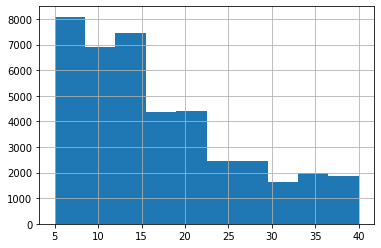

In [ ]:
lengths.hist()

## Trimming

Several categories do not have sufficient entries in the data to be picked up by the model. As such, we combine similar categories and drop others to balance the number of entries corresponding to each.

In [ ]:
hatespeech_trimmed = hatespeech_df.copy()

Economic and political hate is cut entirely. Religious hate categorized as 'christian' and 'other_relig' are only categorized as targeting religion, rather than those specializations.

In [ ]:
hatespeech_trimmed.drop(hatespeech_trimmed[(hatespeech_trimmed['economic'] == 1) | (hatespeech_trimmed['political'] == 1)].index, inplace=True)

In [ ]:
hatespeech_trimmed.drop(['other_relig', 'christian', 'economic', 'political'], axis=1, inplace=True)

East and south asians are combined into one 'asian' group. Additionally, 'arab' and 'hispanic' are combined into 'other_race'.

In [ ]:
hatespeech_trimmed['asian'] = hatespeech_trimmed.apply(lambda row: 1 if (row['south_asian'] == 1) or (row['east_asian'] == 1) else 0, axis=1)
hatespeech_trimmed.drop(columns=['south_asian', 'east_asian'], inplace=True)

In [ ]:
hatespeech_trimmed['other_race'] = hatespeech_trimmed.apply(lambda row: 1 if (row['other_race'] == 1) or (row['arab'] == 1) or (row['hispanic'] == 1) else 0, axis=1)
hatespeech_trimmed.drop(columns=['arab', 'hispanic'], inplace=True)

This is our final list of categorizations.

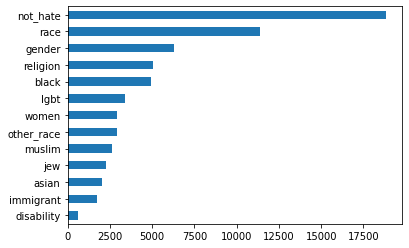

In [ ]:
LABEL_COLUMNS = ['race', 'asian', 'black', 'immigrant', 'other_race', 'religion', 
                 'jew', 'muslim', 'gender', 'women', 'lgbt', 'disability', 'not_hate']
hatespeech_trimmed[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

We reduce the number of entries belonging to 'not_hate' and 'race'.

In [ ]:
hatespeech_trimmed = pd.concat([
    hatespeech_trimmed[hatespeech_trimmed['not_hate'] == 0],
    hatespeech_trimmed[hatespeech_trimmed['not_hate'] == 1].sample(6000)
])
hatespeech_trimmed.shape

(25055, 15)

In [ ]:
hatespeech_trimmed = pd.concat([
    hatespeech_trimmed[hatespeech_trimmed['race'] == 0],
    hatespeech_trimmed[hatespeech_trimmed['race'] == 1].sample(6000)
])
hatespeech_trimmed.shape

(23055, 15)

In [ ]:
hatespeech_trimmed.shape, hatespeech_trimmed.keys()

((23055, 15),
 Index(['text', 'jew', 'language', 'race', 'black', 'immigrant', 'other_race',
        'religion', 'muslim', 'gender', 'women', 'lgbt', 'disability',
        'not_hate', 'asian'],
       dtype='object'))

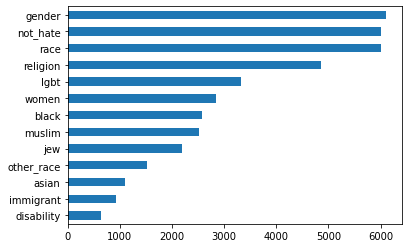

In [ ]:
LABEL_COLUMNS = ['race', 'asian', 'black', 'immigrant', 'other_race', 'religion', 
                 'jew', 'muslim', 'gender', 'women', 'lgbt', 'disability', 'not_hate']
hatespeech_trimmed[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

## Tokenizing/Encoding

We use the pre-trained LaBSE model to encode all of the text entries.

In [ ]:
# with open('hatespeech_df_very_trimmed.pickle', 'rb') as hatespeech_df_file:
#   hatespeech_df = pickle.load(hatespeech_df_file)
hatespeech_df = hatespeech_trimmed
hatespeech_df.dropna(inplace=True)
hatespeech_df.shape

((23055, 15),
 Index(['text', 'jew', 'language', 'race', 'black', 'immigrant', 'other_race',
        'religion', 'muslim', 'gender', 'women', 'lgbt', 'disability',
        'not_hate', 'asian'],
       dtype='object'))

In [ ]:
labse = SentenceTransformer('sentence-transformers/LaBSE')

We wrap the encode function in this custom function to act as a makeshift progress bar.

In [ ]:
counter = 0
def makeshift_progress_encoding(text: str) -> np.ndarray:
  global counter
  counter += 1
  if counter % 1000 == 0:
    print(counter)
  return labse.encode(text)

In [ ]:
hatespeech_df['encoding'] = hatespeech_df.apply(lambda row: makeshift_progress_encoding(row['text']), axis=1)
hatespeech_df.shape, hatespeech_df.keys()

In [ ]:
hatespeech_df.to_pickle('hatespeech_df_encodedv2.pickle')